 # Loaded Data and Basic Checks

In [ ]:
# Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For date manipulations and optional advanced plots
from datetime import datetime

In [ ]:
# Loaded CSV Files
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
# Previewed the Data
print("=== Customers ===")
print(customers.head(), "\n")
print("=== Products ===")
print(products.head(), "\n")
print("=== Transactions ===")
print(transactions.head())

=== Customers ===
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

=== Products ===
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

=== Transactions ===
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166    

In [ ]:
# Basic Structure & Info
print("\n--- Customers Info ---")
print(customers.info())
print(customers.describe(include='all'))

print("\n--- Products Info ---")
print(products.info())
print(products.describe(include='all'))

print("\n--- Transactions Info ---")
print(transactions.info())
print(transactions.describe(include='all'))


--- Customers Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

--- Products Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   Pro

# Data Cleaning

In [ ]:
# Converted Date Columns to Datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

In [ ]:
# Checked for Missing Values
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
# Handled Duplicates
customers.drop_duplicates(subset='CustomerID', inplace=True)
products.drop_duplicates(subset='ProductID', inplace=True)
transactions.drop_duplicates(subset='TransactionID', inplace=True)

In [ ]:
# Ensured Numeric Columns (Price, Quantity, TotalValue)
products['Price'] = pd.to_numeric(products['Price'], errors='coerce')
transactions['Quantity'] = pd.to_numeric(transactions['Quantity'], errors='coerce')
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
transactions['Price'] = pd.to_numeric(transactions['Price'], errors='coerce')

In [ ]:
# Quickly Re-checked
print("\n--- After Cleaning ---")
print(customers.info())
print(products.info())
print(transactions.info())



--- After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 c

# Merged the Datasets for Unified Analysis

In [ ]:
# Merged Transactions with Products
trans_prod = pd.merge(
    transactions,
    products,
    on='ProductID',
    how='left',
    suffixes=('_trans', '_prod')
)

In [ ]:
# Merged with Customers
merged_df = pd.merge(
    trans_prod,
    customers,
    on='CustomerID',
    how='left'
)

In [ ]:
print("\nMerged DataFrame - Sample:\n", merged_df.head())
print(merged_df.info())


Merged DataFrame - Sample:
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_trans                      ProductName     Category  \
0      300.68       300.68  ComfortLiving Bluetooth Speaker  Electronics   
1      300.68       300.68  ComfortLiving Bluetooth Speaker  Electronics   
2      300.68       300.68  ComfortLiving Bluetooth Speaker  Electronics   
3      601.36       300.68  ComfortLiving Bluetooth Speaker  Electronics   
4      902.04       300.68  ComfortLiving Bluetooth Speaker  Electronics   

   Price_prod     CustomerName         Region SignupDate  
0      300.68   Andrea Jenkins    

In [ ]:
# Basic Stats from Merged
print("\nNumber of unique customers:", merged_df['CustomerID'].nunique())
print("Number of unique products:", merged_df['ProductID'].nunique())
print("Number of transactions:", merged_df['TransactionID'].nunique())
print("Total sales value:", merged_df['TotalValue'].sum())


Number of unique customers: 199
Number of unique products: 100
Number of transactions: 1000
Total sales value: 689995.56


# Overall Descriptive Statistics

In [ ]:
# Numeric Summaries
numeric_cols = ['Quantity', 'TotalValue', 'Price_trans']
print("\nNumeric Columns Stats:")
print(merged_df[numeric_cols].describe())


Numeric Columns Stats:
          Quantity   TotalValue  Price_trans
count  1000.000000  1000.000000   1000.00000
mean      2.537000   689.995560    272.55407
std       1.117981   493.144478    140.73639
min       1.000000    16.080000     16.08000
25%       2.000000   295.295000    147.95000
50%       3.000000   588.880000    299.93000
75%       4.000000  1011.660000    404.40000
max       4.000000  1991.040000    497.76000


In [ ]:
# Key Metrics
unique_customers = merged_df['CustomerID'].nunique()
unique_products = merged_df['ProductID'].nunique()
num_transactions = merged_df['TransactionID'].nunique()
total_revenue = merged_df['TotalValue'].sum()
AOV = total_revenue / num_transactions

In [ ]:
print(f"\nUnique Customers: {unique_customers}")
print(f"Unique Products: {unique_products}")
print(f"Total Transactions: {num_transactions}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value (AOV): ${AOV:,.2f}")


Unique Customers: 199
Unique Products: 100
Total Transactions: 1000
Total Revenue: $689,995.56
Average Order Value (AOV): $690.00


# Univariate & Bivariate Plots

##  Distribution of Customers by Region

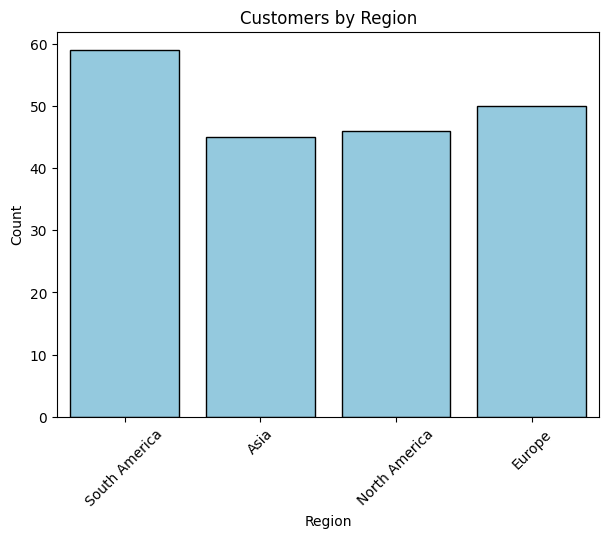

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=customers, x='Region', color='skyblue', edgecolor='black')
plt.title("Customers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-febd9f3a1268>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


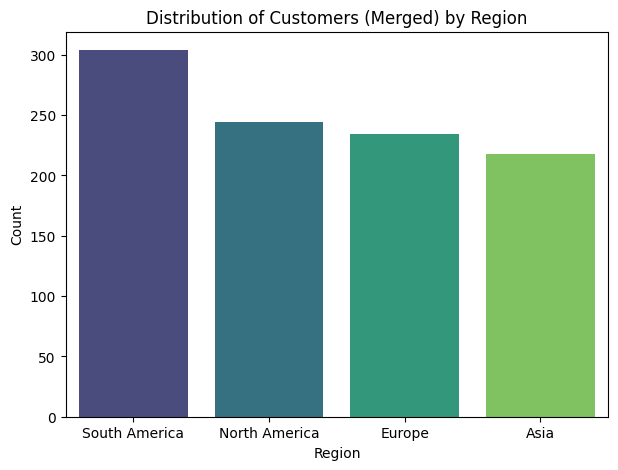

In [ ]:
# only those who transacted
region_counts = merged_df['Region'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title("Distribution of Customers (Merged) by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

##  Distribution of Products by Category

<ipython-input-20-538351de8258>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='Set2', edgecolor='black')


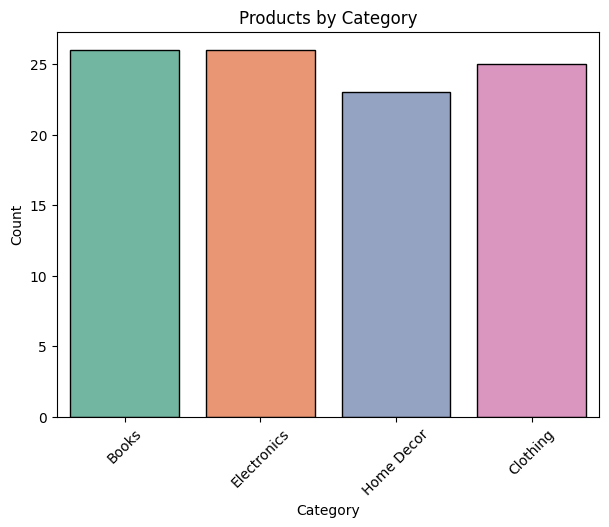

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=products, x='Category', palette='Set2', edgecolor='black')
plt.title("Products by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Distribution of Product Prices

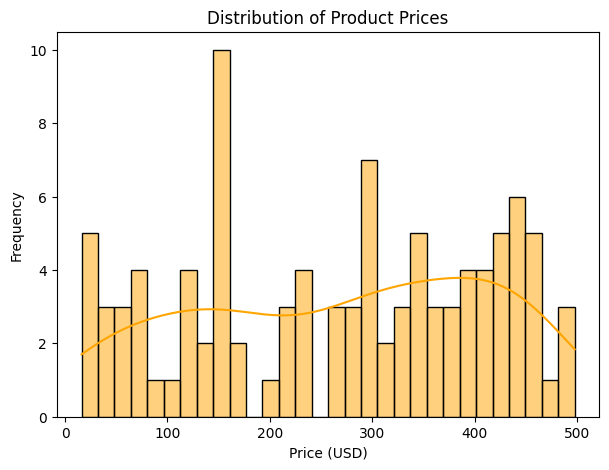

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(products['Price'], bins=30, color='orange', edgecolor='black', kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

##  Distribution of Transaction Quantities

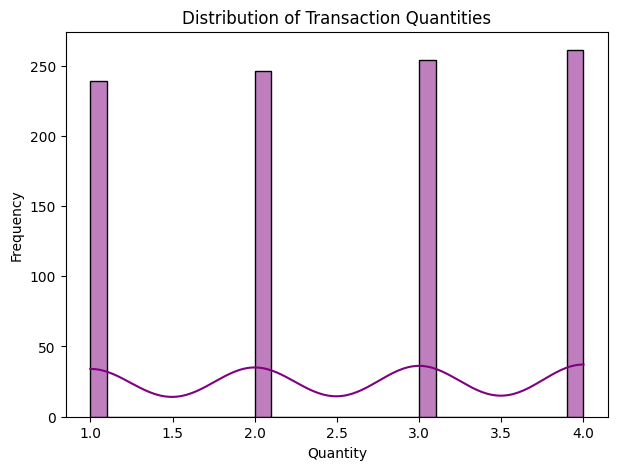

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(transactions['Quantity'], bins=30, color='purple', edgecolor='black', kde=True)
plt.title("Distribution of Transaction Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

## Distribution of Total Transaction Value

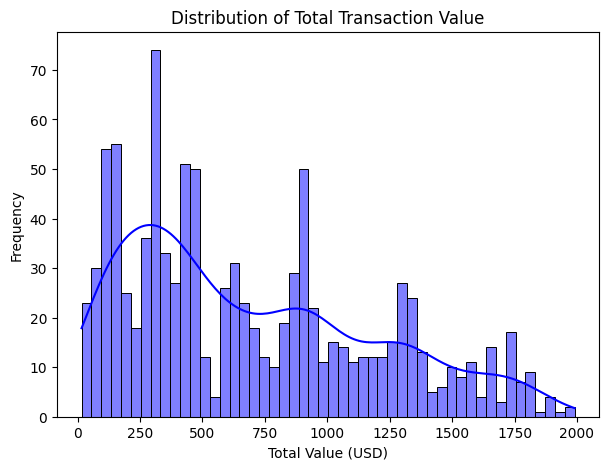

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(transactions['TotalValue'], bins=50, color='blue', edgecolor='black', kde=True)
plt.title("Distribution of Total Transaction Value")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.show()

# Sales & Revenue Analyses

##  Total Sales by Product Category

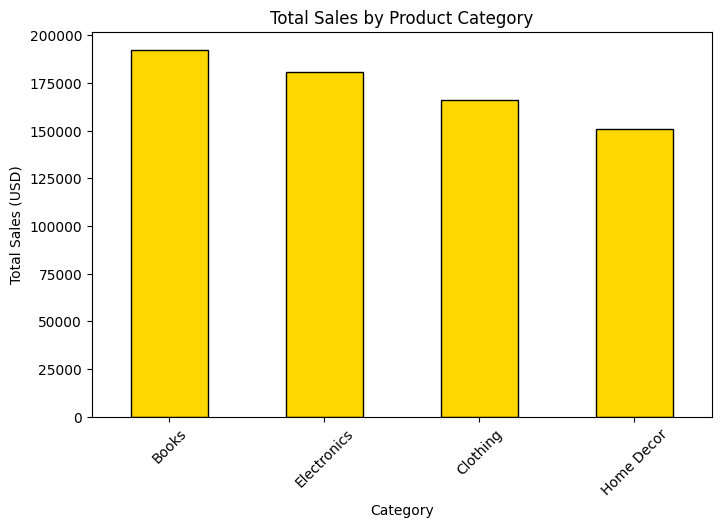

In [ ]:
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='gold', edgecolor='black')
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

## Top 10 Most Purchased Products

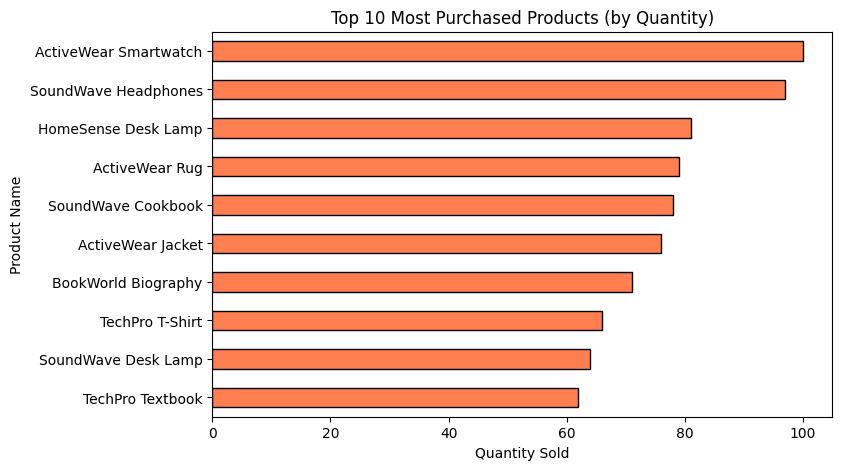

In [ ]:
top_products_quantity = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_products_quantity.plot(kind='barh', color='coral', edgecolor='black')
plt.title("Top 10 Most Purchased Products (by Quantity)")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
# to have the top item at top
plt.gca().invert_yaxis()
plt.show()

## Top 10 Products by Revenue

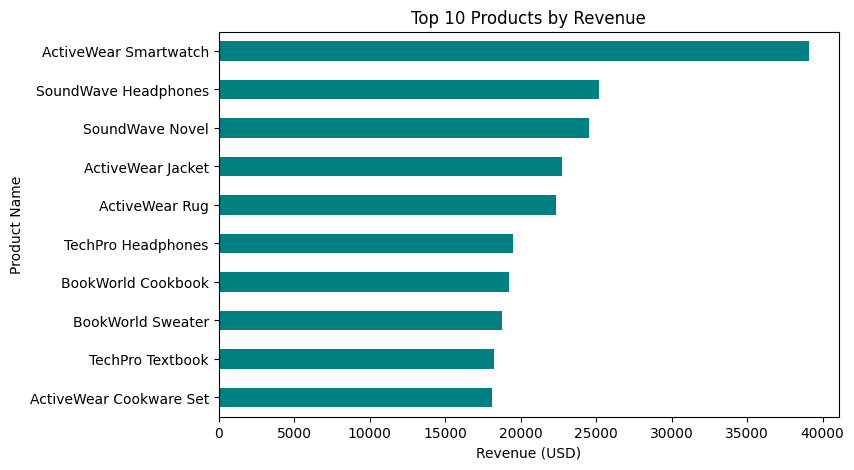

In [ ]:
top_products_revenue = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_products_revenue.plot(kind='barh', color='teal')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()
plt.show()

## Total Spending by Region

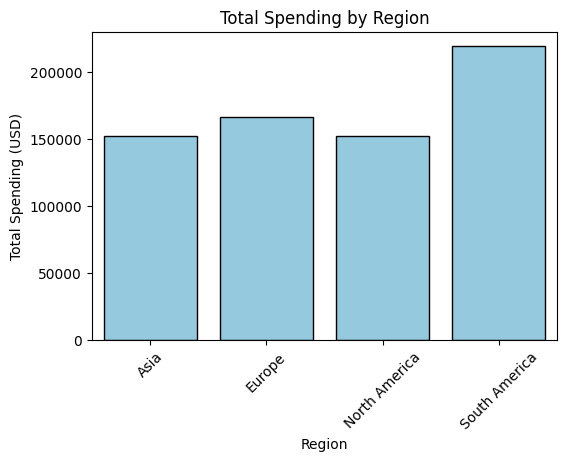

In [ ]:
region_spending = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='TotalValue', data=region_spending, color='skyblue', edgecolor='black')
plt.title("Total Spending by Region")
plt.xlabel("Region")
plt.ylabel("Total Spending (USD)")
plt.xticks(rotation=45)
plt.show()

## Average Spending by Region

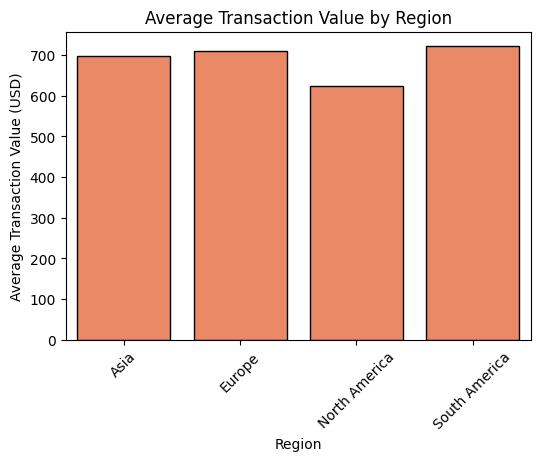

In [ ]:
region_avg_spending = merged_df.groupby('Region')['TotalValue'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='TotalValue', data=region_avg_spending, color='coral', edgecolor='black')
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.xticks(rotation=45)
plt.show()

# Time Series & Trend Analyses

## Monthly Transaction Volume & Revenue

In [ ]:
# Add TransactionMonth
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')

monthly_transactions = merged_df.groupby('TransactionMonth')['TransactionID'].nunique().reset_index()
monthly_transactions.columns = ['TransactionMonth', 'NumTransactions']

monthly_revenue = merged_df.groupby('TransactionMonth')['TotalValue'].sum().reset_index()

In [ ]:
# Converted Period to datetime for plotting
monthly_transactions['TransactionMonth'] = monthly_transactions['TransactionMonth'].astype(str).apply(lambda x: pd.to_datetime(x + '-01'))

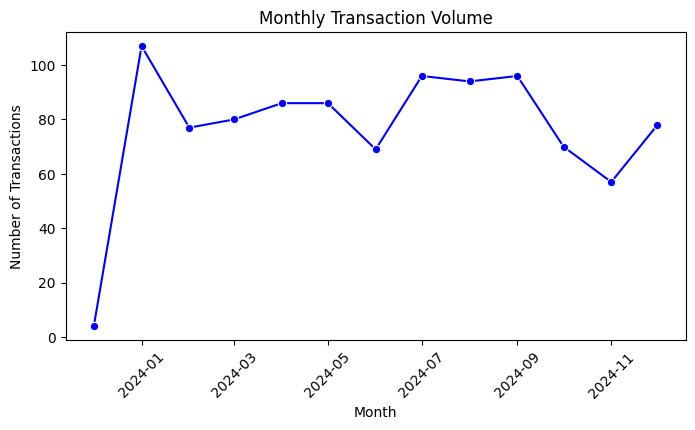

In [ ]:
# Transaction Count
plt.figure(figsize=(8,4))
sns.lineplot(x='TransactionMonth', y='NumTransactions', data=monthly_transactions, marker='o', color='blue')
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Converted Period to datetime for plotting
monthly_revenue['TransactionMonth'] = monthly_revenue['TransactionMonth'].astype(str).apply(lambda x: pd.to_datetime(x + '-01'))

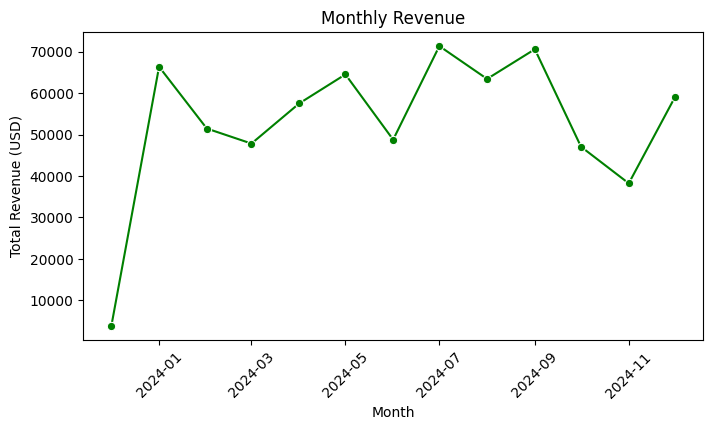

In [ ]:
# Plot Revenue
plt.figure(figsize=(8,4))
sns.lineplot(x='TransactionMonth', y='TotalValue', data=monthly_revenue, marker='o', color='green')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

##  Daily Sales Over Time

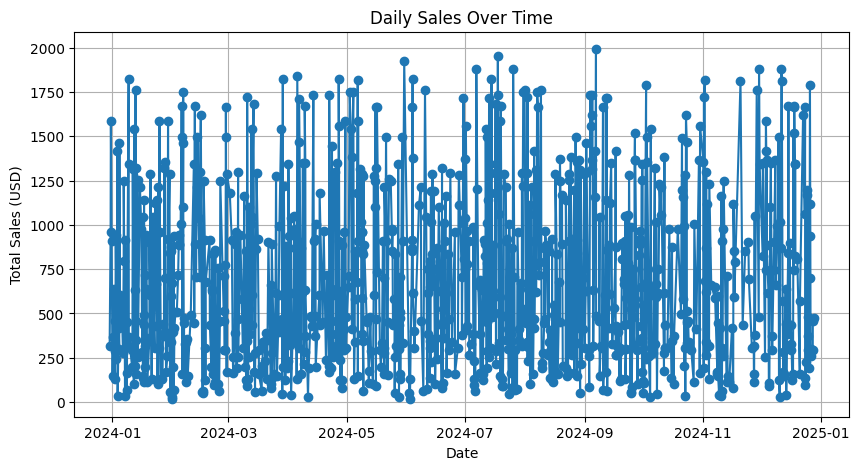

In [ ]:
daily_sales = merged_df.groupby('TransactionDate')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(daily_sales['TransactionDate'], daily_sales['TotalValue'], marker='o', linestyle='-')
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

## Customer Signup Trends

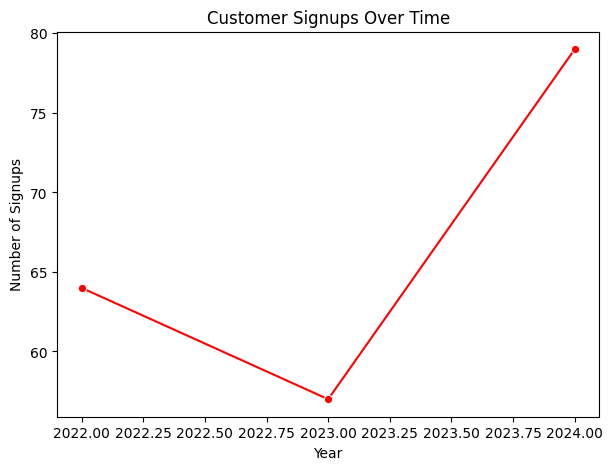

In [ ]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signups_by_year = customers.groupby('SignupYear')['CustomerID'].count().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(x='SignupYear', y='CustomerID', data=signups_by_year, marker='o', color='red')
plt.title("Customer Signups Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

# Correlation & Pairwise Analysis

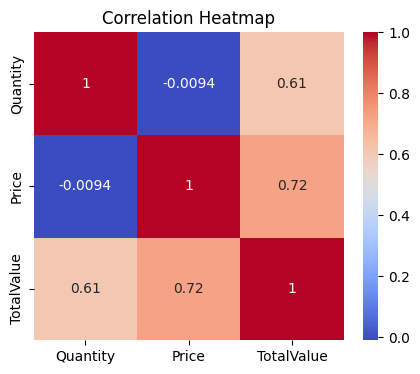

In [ ]:
numeric_data = transactions[['Quantity', 'Price', 'TotalValue']]
plt.figure(figsize=(5,4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

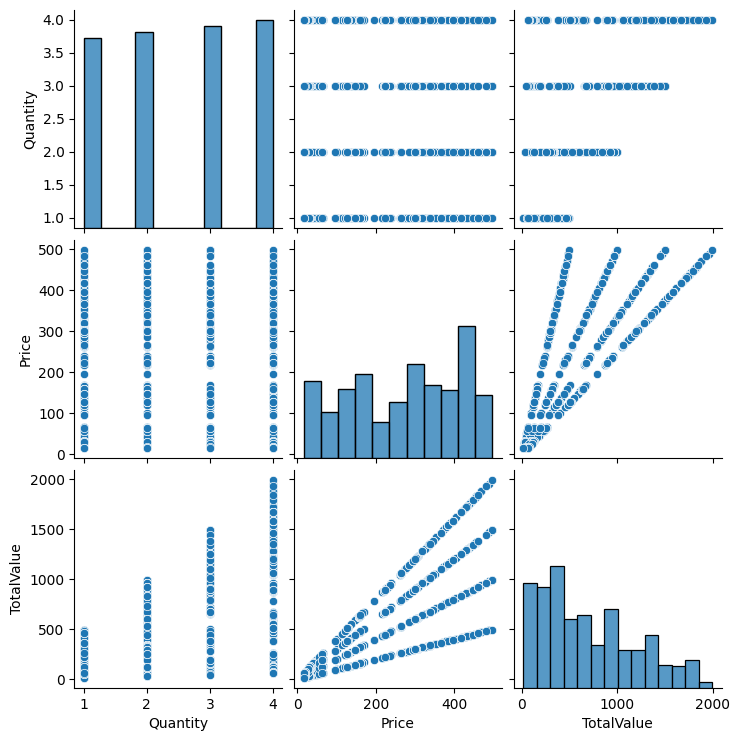

In [ ]:
# Pairplot
sns.pairplot(numeric_data)
plt.show()

# RFM / Customer Purchasing Behavior

* Recency: Days since last purchase
* Frequency: Transaction count per customer
* Monetary: Total spend

In [ ]:
# Computed the RFM
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
current_date = merged_df['TransactionDate'].max()

rfm = merged_df.groupby('CustomerID').agg({
    'TransactionDate': 'max',       # Will convert to Recency
    'TransactionID': 'nunique',     # Frequency
    'TotalValue': 'sum'            # Monetary
}).reset_index()

rfm['Recency'] = (current_date - rfm['TransactionDate']).dt.days
rfm.rename(columns={'TransactionID': 'Frequency', 'TotalValue': 'Monetary'}, inplace=True)
rfm.drop('TransactionDate', axis=1, inplace=True)
rfm.head()

,CustomerID,Frequency,Monetary,Recency
0,C0001,5,3354.52,55
1,C0002,4,1862.74,25
2,C0003,4,2725.38,125
3,C0004,8,5354.88,4
4,C0005,3,2034.24,54


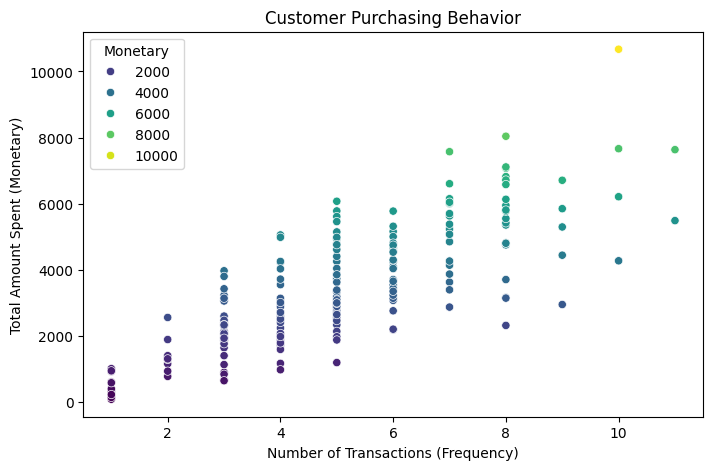

In [ ]:
# Plotted the Customer Purchasing Behavior (Frequency vs. Monetary)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Frequency', y='Monetary', data=rfm, hue='Monetary', palette='viridis')
plt.title("Customer Purchasing Behavior")
plt.xlabel("Number of Transactions (Frequency)")
plt.ylabel("Total Amount Spent (Monetary)")
plt.show()